# 1. Mobile banking analysis to check customer retention rate after upgrade 

In [1]:
from IPython.display import HTML
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The importance of mobile banking application cannot be overemphasized considering the relevance of digital banking and less in-bank transactions. As customers increase bankwide and the world becomes more digitized, there is need to update the mobile banking application to align with individual's need thus increasing revenue generation and customer's retention rate.
Upon update of the mobile banking application, some customers still require re-assurance for enhanced usage.
The problem of either updating the application or using the outdated application now becomes an issue.
But in this notebook we're going to analyze an AB-test where we automatically upgrade the customers from the outdated application to the updated mobile banking version. 
In essence, we will analyse its impact on customer's retention rate. Prior to that, there is need to understand the data. 
Let's load it and preview!

In the meantime, to view the code for this video demo on Mobile banking application click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Abod4eKlV4A;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


In [2]:
# Importing pandas library
import pandas as pd

# Read in the data and assign to df
df = pd.read_csv("C:\\Users\\Akon.usoh\\Desktop\\mobile_banking_app.csv")

# Show the first 10 rows
df.head(10)

,Customer_ID,Mobile_app_version,Login_count,Customer_retention_30,Customer_retention_60
0,CU116,Updated_version,3,False,False
1,CU337,Updated_version,38,True,False
2,CU377,Outdated_version,165,True,False
3,CU483,Outdated_version,1,False,False
4,CU488,Outdated_version,179,True,True
5,CU540,Outdated_version,187,True,True
6,CU1066,Updated_version,0,False,False
7,CU1444,Outdated_version,2,False,False
8,CU1574,Outdated_version,108,True,True
9,CU1587,Outdated_version,153,True,False


# 2. AB-Test Data
The data we have is from 90,189 customers that installed the mobile banking application while the AB-test was running. 
The variables includes:

* Customer_ID - a unique identification number that identifies each customer.
* Mobile_app_version - whether the customer was amidst the control group (Updated_version) or the other group(Outdated_version).
* Login_count - the login count for customer in the first 14 days after installlation
* Customer_retention_30 - was the customer retained 30 days after mobile app installation?
* Customer_retention_60 - was the customer retained 60 days after mobile app installation?

When a customer installed the application, he or she was randomly updated to either the updated version or remained with the outdated application.
As a check, let's deep dive to see if there are roughly the same number of customers in each AB group.

In [3]:
# Count the number of customers in each AB group.
df.groupby('Mobile_app_version')['Customer_ID'].count()

Mobile_app_version
Outdated_version    45489
Updated_version     44700
Name: Customer_ID, dtype: int64

# 3. The distribution of login count

Seemingly, there is approximately same number of customers in each mobile banking version, cool!

The focus of this analysis will be on how the update affects customer retention, but just for fun: Let's plot the distribution of login count of customers during their first week of mobile app installation.


Text(0.5, 1.0, 'Distribution of Login Count of Customers')

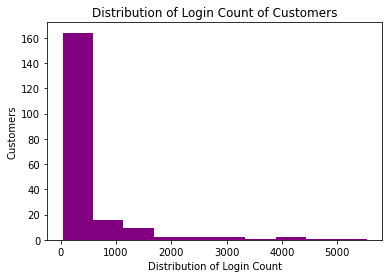

In [4]:
# Import matplot as this command will makes plots appear in the notebook
%matplotlib inline

# Count the number of customers per login counts 
plot_df = df.groupby('Login_count')['Customer_ID'].count()

# Plot the distribution of customers that login 0 to 200 counts
ax = plot_df.head(n=200).plot(x="Login_count", y="Customer_ID", kind="hist", color='purple')
ax.set_xlabel("Distribution of Login Count")
ax.set_ylabel("Customers")
ax.set_title("Distribution of Login Count of Customers")

# 4. Customer overall 30-day retention rate
In the plot above we can see that some customers install the app but then never logged in (0 login count), some customers just logged in a couple of times in their first week, while others got retained!

What we want is for customers to get acquainted to the app and get retained. A common metric in any industry is engaging their customers on the mobile banking application for retention via the percentage of customers that comes back to use it days after they have installed it. The higher the retention rate is, the easier it is to retain customers and build a large customer base.

As a first step, let's look at what 30-day retention rate is overall.

In [5]:
# The % of users that came back 30 days after installation
df['Customer_retention_30'].mean()

0.4452095044850259

# 5. 30-days retention by AB-group

So, a little less than half of the customers returned 30 day after installing the application. Now that we have a benchmark, let's observe how 30-days retention differs between the two AB-groups.

In [6]:
# Calculate 30-days retention for each AB-group
df.groupby('Mobile_app_version')['Customer_ID'].count()

Mobile_app_version
Outdated_version    45489
Updated_version     44700
Name: Customer_ID, dtype: int64

# 6. Should we be confident in the difference?
It appears that there was a slight decrease in 30-day retention when the application was at its Outdated version (44.2%) compared to the control when it was upgraded to an Updated version (44.8%). Though the change is minimal, this can have a large impact. But while we are certain of the difference in the data, how certain should we be that the Outdated version will be worse in the future?

There are a couple of ways we can get at the certainty of these retention numbers. Here we will use bootstrapping: We will repeatedly re-sample our dataset (with replacement) and calculate 30-day retention for those samples. The variation in 30-day retention will give us an indication of how uncertain the retention numbers are.

<AxesSubplot:ylabel='Density'>

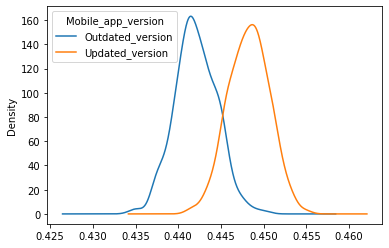

In [7]:
# Creating an list with bootstrapped means for each AB-group
boot_30d = []
for i in range(500):
    boot_mean =df.sample(frac=1, replace=True).groupby('Mobile_app_version')['Customer_retention_30'].mean()
    boot_30d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_30d = pd.DataFrame(boot_30d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_30d.plot(kind='kde')

# 7. Zooming in on the difference
These two distributions above represent the bootstrap uncertainty over what the underlying 30-day retention could be for the two AB-groups. Just viewing this plot indicates a little evidence of difference. Let's zoom in on the difference in 30-day retention

(Note that in this notebook we have limited the number of bootstrap replication to 500 to keep the calculations quick. In "production" we would likely increase this to a much larger number, say, 10 000.)

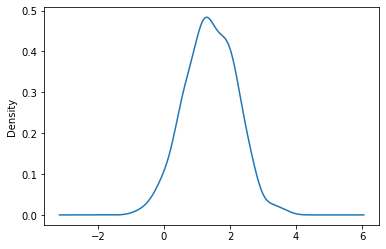

In [8]:
# Add a column with the % difference between the two AB-groups
boot_30d['diff'] = (boot_30d['Updated_version'] - boot_30d['Outdated_version']) /  boot_30d['Outdated_version'] * 100

# Ploting the bootstrap % difference
ax = boot_30d['diff'].plot(kind = 'kde')

# 8. The probability of a difference

From this chart, we can see that the most likely % difference is around 1% - 2%, and that most of the distribution is above 0%, in favor of the Updated_version. But what is the probability that the difference is above 0%? Let's calculate that as well.

In [9]:
# Calculate the probability that 30-day retention is greater when the application is updated
prob = (boot_30d['diff'] > 0).mean()

# Pretty printing the probability
'{:.1%}'.format(prob)

'96.2%'

# 9. 60-day retention by AB-group
The bootstrap analysis tells us that there is a high probability that 1-day retention is better when the application is Updated. However, since customers have only installed the application within 30 days, it is likely that most customers haven't been updated yet.

But after usage for 60 days, it is necessary to know what percentage of the people that installed the application also showed up 60 days later to use the application again.

Let's start by calculating 60-day retention for the two AB-groups.

In [10]:
# Calculate 60-day retention for both AB-groups
df.groupby('Mobile_app_version')['Customer_retention_60'].sum() / df.groupby('Mobile_app_version')['Customer_ID'].count()

Mobile_app_version
Outdated_version    0.182000
Updated_version     0.190201
dtype: float64

# 10. Bootstrapping the difference again
Like with 30-day retention, we see that 60-day retention is slightly lower (18.2%) when the application is Outdated than when the application is updated (19.0%). 
But as before, let's use bootstrap analysis to figure out how certain we should be of the difference between the AB-groups.

'100.0%'

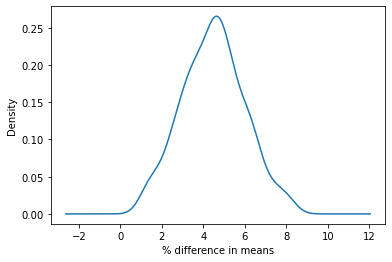

In [11]:
# Creating a list with bootstrapped means for each AB-group
boot_60d = []
for i in range(500):
    boot_mean =df.sample(frac=1, replace=True).groupby('Mobile_app_version')['Customer_retention_60'].mean()
    boot_60d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_60d = pd.DataFrame(boot_60d)

# Adding a column with the % difference between the two AB-groups
boot_60d['diff'] = (boot_60d['Updated_version'] - boot_60d['Outdated_version']) / boot_60d['Outdated_version'] * 100

# Plot the bootstrap % difference
ax = boot_60d['diff'].plot(kind='kde')
ax.set_xlabel("% difference in means")

# Calculate the probability that 60-day retention is greater when the application is updated.
prob = (boot_60d['diff'] > 0).mean()

# Pretty printing the probability
'{:.1%}'.format(prob)

# 11. The conclusion
The bootstrap result tells us that there is strong evidence that 60-day retention is higher when the application is updated than when it is still outdated. The conclusion is: If we want to keep retention high — both 30-day and 60-day retention — we should encourage customers to upgrade the mobile banking application to the latest version. There are, of course, other metrics we could look at, but retention is one of the most important metrics.